## Workshop Week 7 (Optional)

### Note
As said in iLearn, the main purpose of this week's workshop is ensure portfolio 2 on the right track. If you are interested, you may complete the following tasks. 

## Logistic Regression
Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [14]:
bcancer = pd.read_csv("breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [18]:
# Examine the data: check number of rows and number of columns
bcancer.shape

(699, 11)

In [20]:
# Look at the statistical summary of the dataframe
bcancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [22]:
# Check how many classes we do have from the "class" column
set(bcancer['class'])

{2, 4}

In [24]:
# Check number of samples for each class and comment whether dataset is balanced?
print("No. of benign samples: ", bcancer[bcancer['class'] == 2].shape[0])
print("No. of malignant samples: ", bcancer[bcancer['class'] == 4].shape[0])

No. of benign samples:  458
No. of malignant samples:  241


In [26]:
# Deal with the NaN values in the data
bcancer.isna().sum()

sample_code_number              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [34]:
# clean the data by dropping NaN values
bcancer = bcancer.dropna()

In [36]:
# check shape again
bcancer.shape

(683, 11)

In [38]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(bcancer, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(546, 11)
(137, 11)


In [40]:
# Getting input data and targets for building prediction model
X_train = train.drop(['class', 'sample_code_number'], axis=1)
y_train = train['class']
X_test = test.drop(['class', 'sample_code_number'], axis=1)
y_test = test['class']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (546, 9)
y_train shape:  (546,)
X_test shape:  (137, 9)
y_test shape:  (137,)
     clump_thickness  uniformity_cell_size  uniformity_cell_shape  \
566                3                     1                      2   
174                8                     6                      5   
565                5                     7                     10   
206               10                    10                      9   
569               10                    10                      8   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
566                  1                            2          1.0   
174                  4                            3         10.0   
565                 10                            5         10.0   
206                  3                            7          5.0   
569                 10                            6          5.0   

     bland_chromatin  normal_nucleoli  mitoses  
566                3             

In [42]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [46]:
# Evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.9688644688644689
Accuracy score on testing set:  0.9635036496350365


In [48]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set: 
[[83  2]
 [ 3 49]]


In [50]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on train set: 
[[350   9]
 [  8 179]]


**This is the checkpoint mark for this week's workshop. You need to report `Accuracy Score` on test set and also show `confusion matrix`. You also need to provide analysis based on the results you got.**

### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [57]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [59]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.9635036496350365


In [61]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected False, Rank: 2.000


In [63]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.948905109489051
Acc on test set using 2 features:  0.9197080291970803
Acc on test set using 3 features:  0.9708029197080292
Acc on test set using 4 features:  0.9562043795620438
Acc on test set using 5 features:  0.9635036496350365
Acc on test set using 6 features:  0.9635036496350365
Acc on test set using 7 features:  0.9635036496350365
Acc on test set using 8 features:  0.9635036496350365
Acc on test set using 9 features:  0.9635036496350365


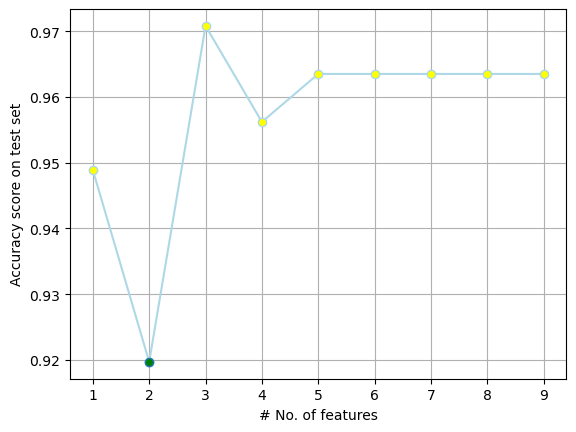

In [69]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'yellow')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'green')

## Conclusion 

Write a brief conclusion to your experiment. You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 